In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [4]:
df.isnull().any()

Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

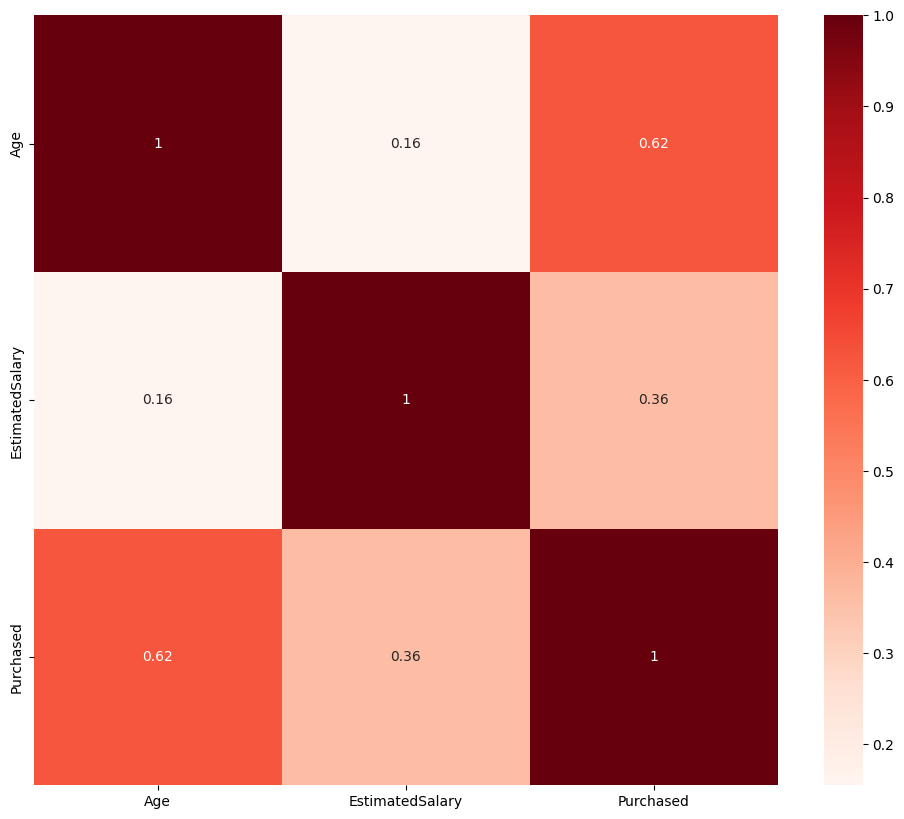

In [5]:
plt.figure(figsize=(12,10))
corr_mat = df.corr()
sns.heatmap(corr_mat, annot = True, cmap = 'Reds')
plt.show()

In [6]:
##split data into dependent and independent variable
x = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [7]:
##standardization
object= StandardScaler()
scale = object.fit_transform(x)

In [8]:
model = linear_model.LogisticRegression()

In [9]:
## splitting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(scale, y, train_size=0.8, random_state=0)

In [10]:
model.fit(x_train, y_train)

LogisticRegression()

In [11]:
print("coefficient ", model.coef_)
print("intercept ", model.intercept_)

coefficient  [[2.03510232 1.06602972]]
intercept  [-0.98533791]


In [12]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

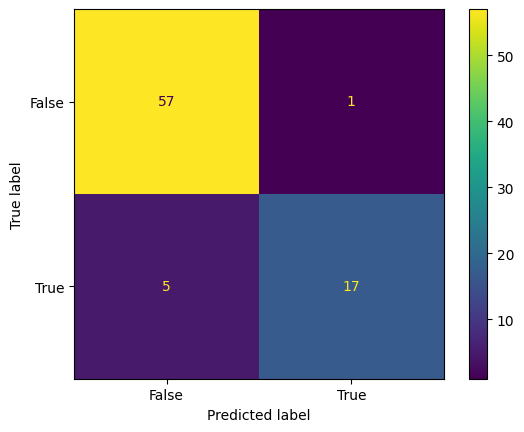

In [13]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [14]:
#tp+tn / total
Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy",Accuracy*100,"%")

Accuracy 92.5 %


In [15]:
# tp /(tp+ fp)
Precision = metrics.precision_score(y_test, y_pred)
print("Precision", Precision*100,"%")

Precision 94.44444444444444 %


In [16]:
error = 1-Accuracy
error

0.07499999999999996

<Axes: xlabel='Age', ylabel='Purchased'>

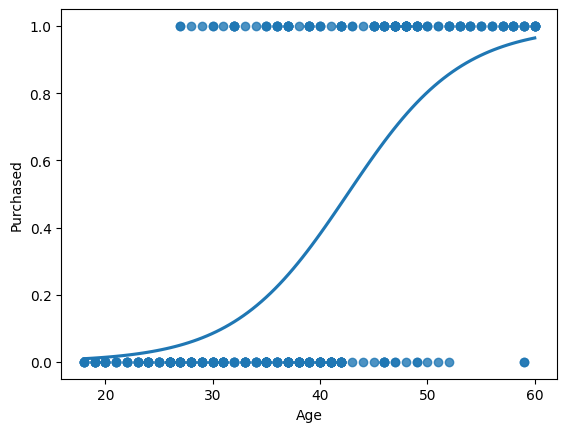

In [17]:
x = df['Age']
y = df['Purchased']

#plot logistic regression curve
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)